<a href="https://colab.research.google.com/github/LI3ARA/FYIRP/blob/main/Notebooks/25/VQA_RAG/Googl_colab/soft_prompting/LoRA_on_LLaVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
from peft import LoraConfig
from transformers import TrainingArguments
from transformers import AutoTokenizer


In [3]:
! pip install torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [4]:
! pip install deepspeed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 35.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 20.0 MB/s eta 0:00:00
  Created wheel for deepspeed: filename=deepspeed-0.16.7-py3-none-any.whl size=1642671 sha256=77f8caa5bc199a31c6994807f63a04f18a315a34a1baaa799185400ea1fc218f
  Stored in directory: /root/.cache/pip/wheels/42/e7/1a/2106f7197cc13e09c68f1b4f55f7e5117a985e726378968970
Successfully built deepspeed


In [5]:
! pip install wandb

![image.png](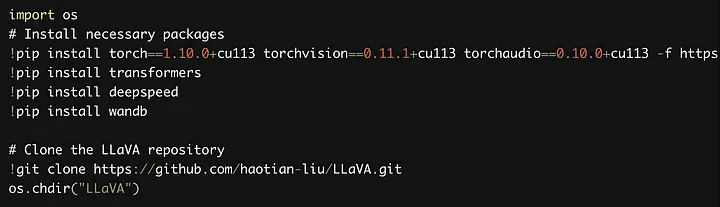
)

%cd /content
!git clone -b 5GB https://github.com/camenduru/LLaVA
%cd /content/LLaVA

In [6]:
%cd /content
!git clone https://github.com/haotian-liu/LLaVA.git
%cd /content/LLaVA

/content
fatal: destination path 'LLaVA' already exists and is not an empty directory.
/content/LLaVA


In [6]:
!git clone https://github.com/haotian-liu/LLaVA.git
!cd LLaVA

Cloning into 'LLaVA'...
remote: Enumerating objects: 2297, done.
remote: Total 2297 (delta 0), reused 0 (delta 0), pack-reused 2297 (from 1)
Receiving objects: 100% (2297/2297), 13.71 MiB | 31.76 MiB/s, done.
Resolving deltas: 100% (1405/1405), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [7]:
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model

model_path = "liuhaotian/llava-v1.5-7b"



tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.


pytorch_model.bin.index.json:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.54G [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/28.4k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

ValueError: The current `device_map` had weights offloaded to the disk. Please provide an `offload_folder` for them. Alternatively, make sure you have `safetensors` installed if the model you are using offers the weights in this format.

In [10]:
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path=model_path,
    model_base=None,
    model_name=get_model_name_from_path(model_path),
    offload_folder = 'content/llava_model'
)

You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

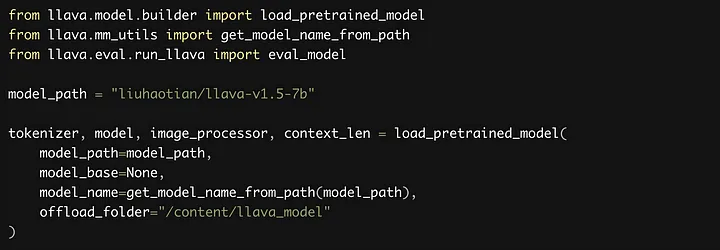

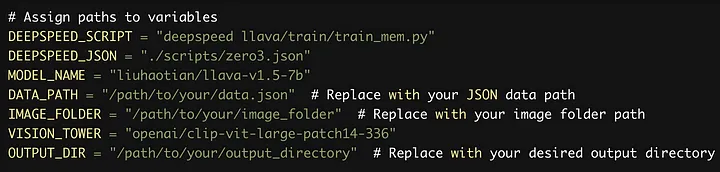


In [ ]:
# Assign paths to variables
DEEPSPEED_SCRIPT = "deepspeed llava/train/train_mem.py"
DEEPSPEED_JSON = "./scripts/zero3.json"
MODEL_NAME = "liuhaotian/llava-v1.5-7b"
VISION_TOWER = "openai/clip-vit-large-patch14-336"

DATA_PATH = "/path/to/your/data.json"  # Replace with your JSON data path
IMAGE_FOLDER = "/path/to/your/image_folder"  # Replace with your image folder path
OUTPUT_DIR = "/path/to/your/output_directory"  # Replace with your desired output directory

In [ ]:

lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

training_args = TrainingArguments(
    output_dir="./llava_lora_output",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    learning_rate=2e-4,
    num_train_epochs=3,
    logging_steps=10,
    save_strategy="epoch",
    save_total_limit=1,
    fp16=True,
    remove_unused_columns=False,
    report_to="none"
)

model_name = "liuhaotian/llava-vicuna-7b"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = LlavaLlamaForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16)

from peft import get_peft_model
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

# Load your converted dataset
with open(output_path, 'r') as f:
    train_data = json.load(f)

dataset = {"train": train_data, "validation": train_data[:100]}  # simple val split

from llava.train.train import train

train(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset["train"],
    eval_dataset=dataset["validation"],
    training_args=training_args
)

# Save LoRA adapter
model.save_pretrained("/content/drive/MyDrive/llava-lora-spiqa")
tokenizer.save_pretrained("/content/drive/MyDrive/llava-lora-spiqa")

In [ ]:

    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

training_args = TrainingArguments(
    output_dir="./llava_lora_output",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    learning_rate=2e-4,
    num_train_epochs=3,
    logging_steps=10,
    save_strategy="epoch",
    save_total_limit=1,
    fp16=True,
    remove_unused_columns=False,
    report_to="none"
)

model_name = "liuhaotian/llava-vicuna-7b"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = LlavaLlamaForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16)

from peft import get_peft_model
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

# Load your converted dataset
with open(output_path, 'r') as f:
    train_data = json.load(f)

dataset = {"train": train_data, "validation": train_data[:100]}  # simple val split

from llava.train.train import train

train(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset["train"],
    eval_dataset=dataset["validation"],
    training_args=training_args
)

# Save LoRA adapter
model.save_pretrained("/content/drive/MyDrive/llava-lora-spiqa")
tokenizer.save_pretrained("/content/drive/MyDrive/llava-lora-spiqa")